<div style="background-color: Black; padding: 15px; font: bold 30px arial; color: white; border: 2px solid yellow; border-radius: 8px ; text-align: center">
    DCGAN – Handwritten Digit Generator
</div>

## **Problem Statement**
 - The goal of this project is to generate handwritten digits similar to the MNIST dataset using a Deep Convolutional Generative Adversarial Network (DCGAN).
 - The DCGAN model will be trained on a dataset of handwritten digits to learn the underlying distribution of the data and generate new, synthetic digits that resemble the real data.

## **Dataset**
- The MNIST dataset is a popular dataset for handwritten digit recognition. It consists of 60,000 handwritten digits from 0 to 9, with each digit represented as a 28x28 pixel image.

## **Solution Strategy**
1. **Data Preparation**: Load the MNIST dataset and preprocess the data by normalizing the pixel
values to be between 0 and 1.
2. **DCGAN Model**: Define the DCGAN model architecture, which consists of a generator network and a discriminator network.
3. **Training**: Train the DCGAN model using the Adam optimizer and binary cross-entropy loss function.

## Prepare the Environment

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import torch, torchvision
import numpy as np
import os
import torch
from torch import nn, optim
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn.functional as F
from torchvision.utils import save_image
import seaborn as sns
from sklearn.metrics import confusion_matrix
import shutil
from IPython.display import Image, display

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device 

## load data and Prepare it

In [ ]:
# Hyperparameters
batch_size = 128
lr = 0.0002
latent_dim = 100
epochs = 30

In [13]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
dataset = datasets.MNIST(root="data", train=True, download=True, transform=transform)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


## Define the Model Architecture

In [14]:
# Generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        return img.view(-1, 1, 28, 28)

In [15]:
# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        validity = self.model(img_flat)
        return validity


In [16]:
G = Generator().to(device)
D = Discriminator().to(device)

In [17]:
optimizer_G = optim.Adam(G.parameters(), lr=lr)
optimizer_D = optim.Adam(D.parameters(), lr=lr)

adversarial_loss = nn.BCELoss()

## Train the Model 

Epoch 1/30 | D loss: 0.0312 | G loss: 3.7460
Epoch 2/30 | D loss: 0.1853 | G loss: 2.6995
Epoch 3/30 | D loss: 0.1252 | G loss: 6.2833
Epoch 4/30 | D loss: 0.2166 | G loss: 2.2010
Epoch 5/30 | D loss: 0.8557 | G loss: 0.8321
Epoch 6/30 | D loss: 0.3841 | G loss: 2.3024
Epoch 7/30 | D loss: 0.5075 | G loss: 1.3083
Epoch 8/30 | D loss: 0.3286 | G loss: 2.0271
Epoch 9/30 | D loss: 1.1351 | G loss: 0.6799
Epoch 10/30 | D loss: 0.2770 | G loss: 1.6925
Generated images for epoch 10 saved to /content/drive/MyDrive/dcgan/epoch_10.png


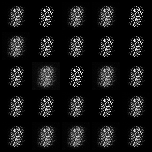

Epoch 11/30 | D loss: 0.3706 | G loss: 1.5695
Epoch 12/30 | D loss: 0.6892 | G loss: 0.9061
Epoch 13/30 | D loss: 0.2809 | G loss: 1.6317
Epoch 14/30 | D loss: 0.2202 | G loss: 2.6402
Epoch 15/30 | D loss: 0.2683 | G loss: 3.6981
Epoch 16/30 | D loss: 0.3065 | G loss: 3.1216
Epoch 17/30 | D loss: 0.1146 | G loss: 3.7928
Epoch 18/30 | D loss: 0.1662 | G loss: 4.1256
Epoch 19/30 | D loss: 0.0485 | G loss: 3.6688
Epoch 20/30 | D loss: 0.2062 | G loss: 4.4192
Generated images for epoch 20 saved to /content/drive/MyDrive/dcgan/epoch_20.png


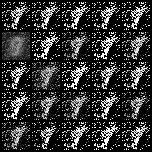

Epoch 21/30 | D loss: 0.0232 | G loss: 5.7793
Epoch 22/30 | D loss: 0.1210 | G loss: 3.9272
Epoch 23/30 | D loss: 0.1144 | G loss: 5.4117
Epoch 24/30 | D loss: 0.3038 | G loss: 2.7434
Epoch 25/30 | D loss: 0.1150 | G loss: 5.0035
Epoch 26/30 | D loss: 0.1656 | G loss: 6.0325
Epoch 27/30 | D loss: 0.2448 | G loss: 3.8132
Epoch 28/30 | D loss: 0.2778 | G loss: 4.0316
Epoch 29/30 | D loss: 0.1378 | G loss: 2.7230
Epoch 30/30 | D loss: 0.0285 | G loss: 5.1856
Generated images for epoch 30 saved to /content/drive/MyDrive/dcgan/epoch_30.png


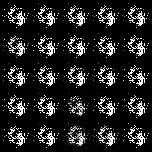

In [18]:

# Training loop
for epoch in range(epochs):
    for i, (imgs, _) in enumerate(loader):
        batch_size_i = imgs.size(0)

        real = torch.ones(batch_size_i, 1, device=device)
        fake = torch.zeros(batch_size_i, 1, device=device)

        imgs = imgs.to(device)

        # Train Generator
        optimizer_G.zero_grad()
        z = torch.randn(batch_size_i, latent_dim, device=device)
        gen_imgs = G(z)
        g_loss = adversarial_loss(D(gen_imgs), real)
        g_loss.backward()
        optimizer_G.step()

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = adversarial_loss(D(imgs), real)
        fake_loss = adversarial_loss(D(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

    print(f"Epoch {epoch+1}/{epochs} | D loss: {d_loss.item():.4f} | G loss: {g_loss.item():.4f}")

    if (epoch + 1) % 10 == 0:
    # Local directory to save temporarily
       local_samples_dir = "samples"
       os.makedirs(local_samples_dir, exist_ok=True)
       local_image_path = os.path.join(local_samples_dir, f"epoch_{epoch+1}.png")
       utils.save_image(gen_imgs.data[:25], local_image_path, nrow=5, normalize=True)

       drive_samples_dir = "/content/drive/MyDrive/dcgan"
       os.makedirs(drive_samples_dir, exist_ok=True)
       drive_image_path = os.path.join(drive_samples_dir, f"epoch_{epoch+1}.png")

       shutil.copy(local_image_path, drive_image_path)
       print(f"Generated images for epoch {epoch+1} saved to {drive_image_path}")
       display(Image(filename=drive_image_path))


## Visualize Generated Images 

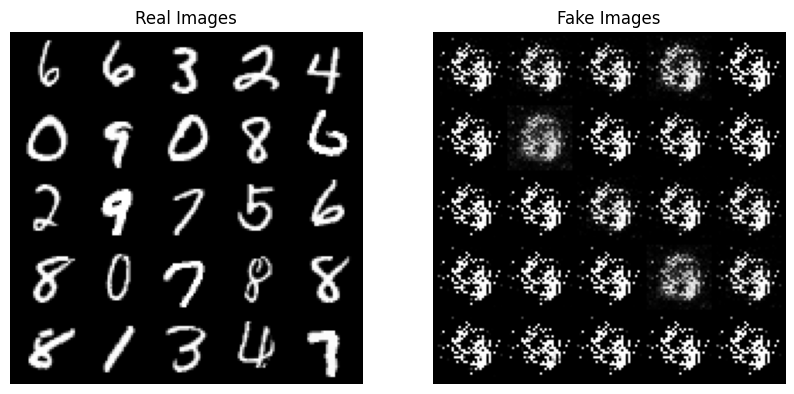

In [19]:

dataiter = iter(loader)
real_images, _ = next(dataiter)
real_images = real_images[:25].to(device)

z = torch.randn(25, latent_dim, device=device)
fake_images = G(z).detach()

# Display real and fake images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(utils.make_grid(real_images.cpu(), nrow=5, normalize=True).permute(1, 2, 0))
plt.title("Real Images")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(utils.make_grid(fake_images.cpu(), nrow=5, normalize=True).permute(1, 2, 0))
plt.title("Fake Images")
plt.axis("off")

plt.show()

Displaying generated images from /content/drive/MyDrive/dcgan:
Displaying: epoch_10.png


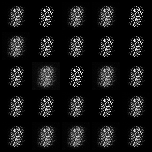

Displaying: epoch_20.png


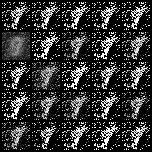

Displaying: epoch_30.png


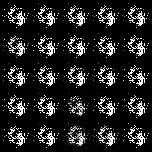

In [20]:
# After the training loop
drive_samples_dir = "/content/drive/MyDrive/dcgan"  # Use the same path as in your training loop

# Get a list of image files in the directory
image_files = [f for f in os.listdir(drive_samples_dir) if f.endswith('.png')]
image_files.sort()  # Sort the files to display them in chronological order

print(f"Displaying generated images from {drive_samples_dir}:")

# Display each image
from IPython.display import Image, display
for image_file in image_files:
    image_path = os.path.join(drive_samples_dir, image_file)
    print(f"Displaying: {image_file}")
    display(Image(filename=image_path))

## Save the Trained Model 

In [21]:

# Save model weights
torch.save(G.state_dict(), "generator.pth")
torch.save(D.state_dict(), "discriminator.pth")

Save on google drive

In [22]:

local_model_path = 'generator.pth'
local_model_path = 'discriminator.pth'

# Path where you want to save in Drive
drive_model_path = '/content/drive/MyDrive/dcgan/'

os.makedirs(os.path.dirname(drive_model_path), exist_ok=True)

shutil.copy(local_model_path, drive_model_path)
print(f"Model saved to {drive_model_path}")


Model saved to /content/drive/MyDrive/dcgan/


<div style="font-size: 20px; background-color: rgb(0, 0, 0); color: white; border: 2px solid yellow; border-radius: 15px; padding: 20px;"> 

# Conclusion

##  DCGAN Digit Generator

The project demonstrates how a GAN can learn to synthesize new, never-before-seen images that resemble the original dataset. The Streamlit app allows users to interact with the generator and understand how GANs evolve through training.

---

## Project Workflow (Step-by-Step)

| Step                             | Description                                                                                                                 |
| -------------------------------- | --------------------------------------------------------------------------------------------------------------------------- |
| **1. Data Loading**              | Loaded MNIST dataset using `torchvision.datasets`. Transformed it into normalized tensors.                                  |
| **2. Generator & Discriminator** | Defined two neural networks using `torch.nn.Sequential`. Generator upsamples noise; Discriminator classifies real vs. fake. |
| **3. Training Loop**             | Trained GAN using alternating updates to Generator and Discriminator. Used `BCELoss` and Adam optimizer.                    |
| **4. Model Saving**              | Saved `generator.pth` and `discriminator.pth` after training. Generated image samples were saved per epoch.                 |
| **5. Streamlit Interface**       | Created a two-mode app: generate digits from noise or simulate retraining based on a user-uploaded image.                   |
| **6. Deployment (Optional)**     | App is deployable using Streamlit Cloud or Hugging Face Spaces.                                                             |

---

## Tools & Libraries Used

| Category          | Tool/Library                | Purpose                                          |
| ----------------- | --------------------------- | ------------------------------------------------ |
| **Deep Learning** | PyTorch                     | Model training and implementation                |
| **Data Loading**  | torchvision.datasets        | Load and normalize MNIST data                    |
| **Visualization** | matplotlib                  | Visualize generated images and training progress |
| **Web App**       | Streamlit                   | Deploy interactive image generator               |
| **Image Tools**   | torchvision.utils           | Generate image grids                             |
| **Image Upload**  | PIL, torchvision.transforms | Load and normalize user-uploaded images          |

---

## Streamlit Features

* Generate random digits using noise vectors
* Upload a grayscale image and run a single retraining step
* Visualize results in real time

---

## Insight & Conclusion

* DCGANs are capable of generating realistic images from noise after sufficient training.
* Generator training is unstable early on, but improves with carefully tuned learning rates and loss monitoring.
* Interactive apps help bridge the gap between abstract ML models and tangible results.

### Key Takeaway:

Generative models like GANs are powerful tools for creating synthetic data. Combining them with tools like Streamlit allows for hands-on education, experimentation, and sharing with others.

</div>


#


 ---
<div style="background-color: black; padding: 15px; font: bold 25px arial; color: wihte; border: 2px solid Yellow; border-radius: 8px ; text-align: center">
  <p style="text-align: center;">Thank you for your time and efforts!</p>
  <h3 style="text-align: center;">By: Youssef Bassiony Abdlah</h3>
  <div style="display: inline-block; text-algeint: center">
    <a  href="youssefbassiony113@gmail.com" title="Redirect to e-mail">
      <img src="https://img.icons8.com/?size=100&id=37246&format=png&color=000000"  alt="e-mail" style="width: 50px; height: 50px; margin: 0 10px; ">
    </a>
    <a href="https://wa.me/+201001725166/" title="Redirect to What'sApp">
      <img src="https://img.icons8.com/?size=160&id=A1JUR9NRH7sC&format=png" alt="What'sApp" style="width: 50px; height: 50px; margin: 0 10px;">
    </a>
    <a href="https://www.linkedin.com/in/youssef-bassiony/" title="Redirect to LinkedIn">
      <img src="https://img.icons8.com/?size=100&id=xuvGCOXi8Wyg&format=png&color=000000" alt="LinkedIn" style="width: 50px; height: 50px; margin: 0 10px;">
    </a>
  </div>
</div>
